In [1]:
import numpy as np

In [2]:
a = np.random.randn(240, 240, 128)
b = np.random.randn(240, 240, 128)

In [3]:
from metrics import CC, SAM, Q2n, ERGAS

In [4]:
%timeit CC(a,b)
%timeit SAM(a,b)
%timeit Q2n(a,b,)
%timeit ERGAS(a, b)

193 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
51.1 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
11.5 s ± 184 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
57.1 ms ± 2.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from vistool import hist_line_stretch
import scipy.io as sio

In [4]:
################  { for colorbar }  ################
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
color_list = ['#0000FF', '#00FF33', '#FFFF33', '#FF0000', '#FF00FF']
my_cmap = LinearSegmentedColormap.from_list('rain', color_list)
cm.register_cmap(cmap=my_cmap)
################  { for colorbar }  ################

In [ ]:
image = sio.loadmat('../result/HyperALiSameTime/HSRnet/HyperALiSameTime1.mat')
vis = image['data'].astype(np.float)
visout = hist_line_stretch(vis[:,:,(24, 8, 2)], 4095)
plt.subplot(131)
plt.imshow(visout)
plt.axis('off')
plt.title('Predeicted')
GT = sio.loadmat('../../HypersharpDataset/HyperALiSameTime/HyperALiSameTime1.mat')
visgt = GT['HSHR'].astype(np.float)
visgt = hist_line_stretch(visgt[:,:,(24, 8, 2)], 4095)
plt.subplot(132)
plt.imshow(visgt)
plt.axis('off')
plt.title('GT')
plt.subplot(133)
plt.imshow(np.abs(visout-visgt).mean(axis=-1), vmin=0, vmax=0.8, cmap="rain")
plt.colorbar(cmap='rain')
plt.axis('off')
plt.title('Average Error')

In [26]:

image = sio.loadmat('../results/HyperALiSameTime/HSRnet/HyperALiSameTime1.mat')

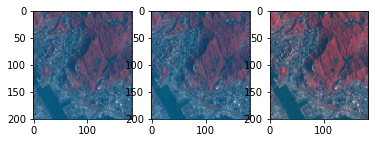

In [37]:
dataset = sio.loadmat('../../HypersharpDataset/HyperALiSameTime/HyperALiSameTime2.mat')
ms = dataset['HSHR']
# visms1 = hist_line_stretch(ms[:,:,(8,3,2)], 4095)
visms1  = ms[:,:,(30, 10, 4)]
visms1 = (visms1-visms1.min())/(visms1.max()-visms1.min())
plt.subplot(131)
plt.imshow(visms1)
# plt.axis('off')

# total mean std for norm
visms = (visms1-visms1.mean())/visms1.std()
visms2 = (visms-visms.min())/(visms.max()-visms.min())
plt.subplot(132)
plt.imshow(visms2)
# plt.axis('off')
# per band mean and std for norm

tmp_mean = visms1.reshape(-1, 3).mean(axis=0)
tmp_std = visms1.reshape(-1, 3).std(axis=0)
visms = (visms1-tmp_mean)/tmp_std
tmp_max = visms.reshape(-1, 3).max(axis=0)
tmp_min = visms.reshape(-1, 3).min(axis=0)
visms2 = (visms-tmp_min)/(tmp_max-tmp_min)
plt.subplot(133)
plt.imshow(visms2)
# plt.axis('off')
plt.show()

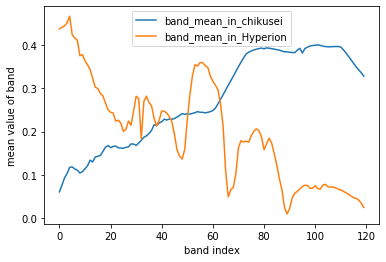

In [12]:
sample_band_mean_in_chikuse = np.load('../sample_mean_in_chikusei.npy').reshape(120)
dataset = sio.loadmat('../../HypersharpDataset/HyperALiSameTime/HyperALiSameTime1.mat')
sample_band_mean_in_Hyperion = dataset['HSLR'].reshape(-1, 120).mean(axis=0)/4095
plt.subplot(1,2,1)
plt.plot(sample_band_mean_in_chikuse, label='band_mean_in_chikusei')
plt.plot(sample_band_mean_in_Hyperion, label='band_mean_in_Hyperion')
plt.xlabel('band index')
plt.ylabel('mean value of band')
plt.legend()

plt.subplot(1,2,2)

plt.show()


/tmp/ipykernel_30116/4101381898.py:17: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(cmap='rain')


Text(0.5, 1.0, 'Average Error')

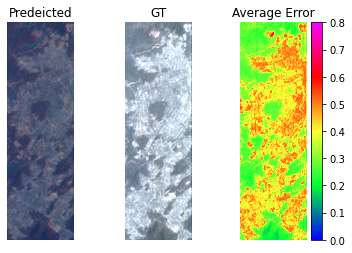

In [18]:
image = sio.loadmat('../results/HyperALiSameTime/base_transformer/HyperALiSameTime1.mat')
vis = image['data'].astype(np.float64)
visout = hist_line_stretch(vis[:,:,(8, 4, 2)], 4095)
plt.subplot(131)
plt.imshow(visout)
plt.axis('off')
plt.title('Predeicted')
GT = sio.loadmat('../../HypersharpDataset/HyperALiSameTime/HyperALiSameTime1.mat')
visgt = GT['HSHR'].astype(np.float64)
visgt = hist_line_stretch(visgt[:,:,(8, 4, 2)], 4095)
plt.subplot(132)
plt.imshow(visgt)
plt.axis('off')
plt.title('GT')
plt.subplot(133)
plt.imshow(np.abs(visout-visgt).mean(axis=-1), vmin=0, vmax=0.8, cmap="rain")
plt.colorbar(cmap='rain')
plt.axis('off')
plt.title('Average Error')

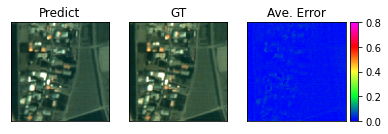

In [85]:
from papertools.plot_subfigs_colorbar import plot_subfigs_colorbar
out = sio.loadmat('../results/Chikusei/base_transformer/0001.mat')
GT = np.load('../../HypersharpDataset/Chikusei_MATLAB/test/HSHR/0001.npy')
out = out['data'].astype(np.float64)
# vis_result_gt(out, GT, bound=(0, 0.8), L=12)
out = hist_line_stretch(out[:,:,(8,4,2)], 4095)
GT = hist_line_stretch(GT[:,:,(8,4,2)], 4095)
error = np.abs(GT-out).mean(axis=2)
plot_subfigur_colorbar({'Predict':out, 'GT':GT, 'Ave. Error': error},plotsize=[1, 3], bound=(0, 0.8))

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img1 = np.load('../img1-ca.npy')
img2 = np.load('../img2-ca.npy')
img3 = np.load('../img3-ca.npy')

Text(0, 0.5, 'CA output')

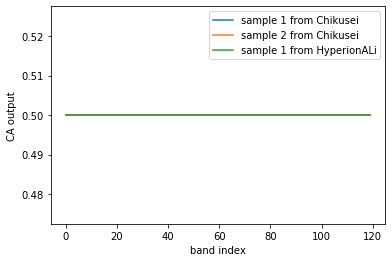

In [3]:
plt.plot(img1, label='sample 1 from Chikusei')
plt.plot(img2, label='sample 2 from Chikusei')
plt.plot(img2, label='sample 3 from HyperionALi')
plt.legend()
plt.xlabel('band index')
plt.ylabel('CA output')